# 估算树叶的面积

In [86]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

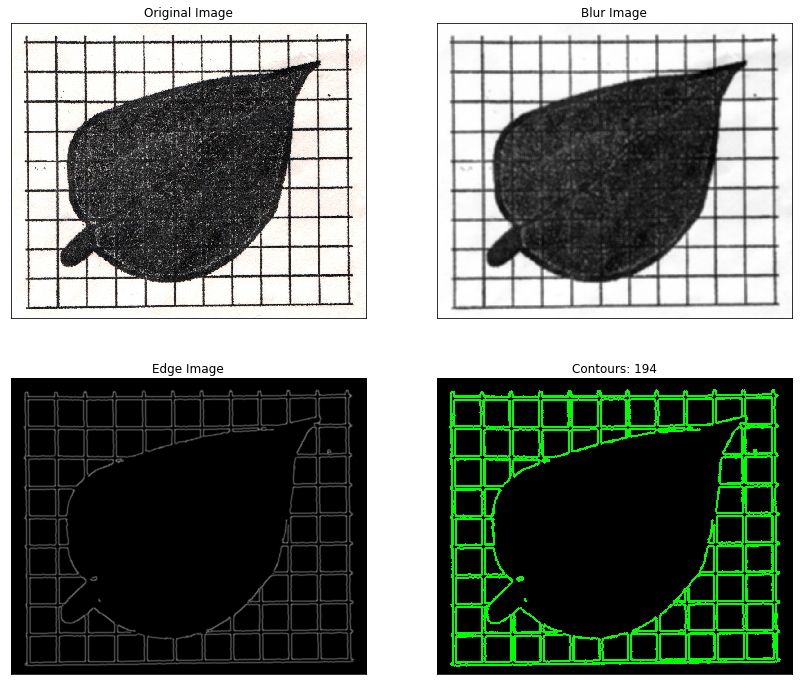

In [87]:
img = cv2.imread('leaf.png')
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.GaussianBlur(gray1, (7, 7), 9)
edges = cv2.Canny(gray2, 100, 200, 3)
#ret, edges = cv2.threshold(gray2, 100, 200, cv2.THRESH_BINARY)  

#contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours0 = contours
imgc = np.zeros_like(img)
cv2.drawContours(imgc, contours, -1, (0,255,0), 3)

plt.figure(figsize=(14,12))
plt.subplot(2,2,1), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(gray2, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(edges, cmap = 'gray', interpolation='bicubic')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(imgc, cmap = 'gray')
plt.title('Contours: %d' % len(contours)), plt.xticks([]), plt.yticks([])

plt.show()

In [80]:
def cnt_area(cnt):
  area = cv2.contourArea(cnt)
  return area

In [81]:
contours.sort(key = cnt_area, reverse=True)
areas = list(map(cnt_area, contours))
maxarea = areas[0]
halfarea = maxarea / 2
maxarea

3546.0

In [82]:
areas

[3546.0,
 3538.0,
 3479.0,
 3471.0,
 3458.0,
 3456.5,
 3451.0,
 3450.0,
 3446.5,
 3443.0,
 3430.5,
 3423.0,
 3417.0,
 3412.0,
 3408.5,
 3402.5,
 3391.0,
 3383.0,
 3380.0,
 3373.0,
 3291.5,
 3282.0,
 3008.5,
 2981.5,
 675.0,
 663.5,
 47.0,
 45.0,
 36.0,
 33.0,
 30.5,
 29.5,
 27.5,
 25.0,
 22.0,
 21.5,
 15.5,
 15.5,
 15.0,
 15.0,
 13.5,
 13.0,
 12.0,
 11.0,
 10.5,
 10.5,
 10.5,
 10.0,
 9.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 7.0,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.5,
 5.5,
 5.5,
 5.5,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.5,
 3.5,
 3.5,
 3.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1

In [83]:
bigcells = sum(list(map(lambda x: 1 if x > halfarea else 0, areas)))
bigcells

24

In [84]:
leafarea = 11 * 9 - bigcells
leafarea

75

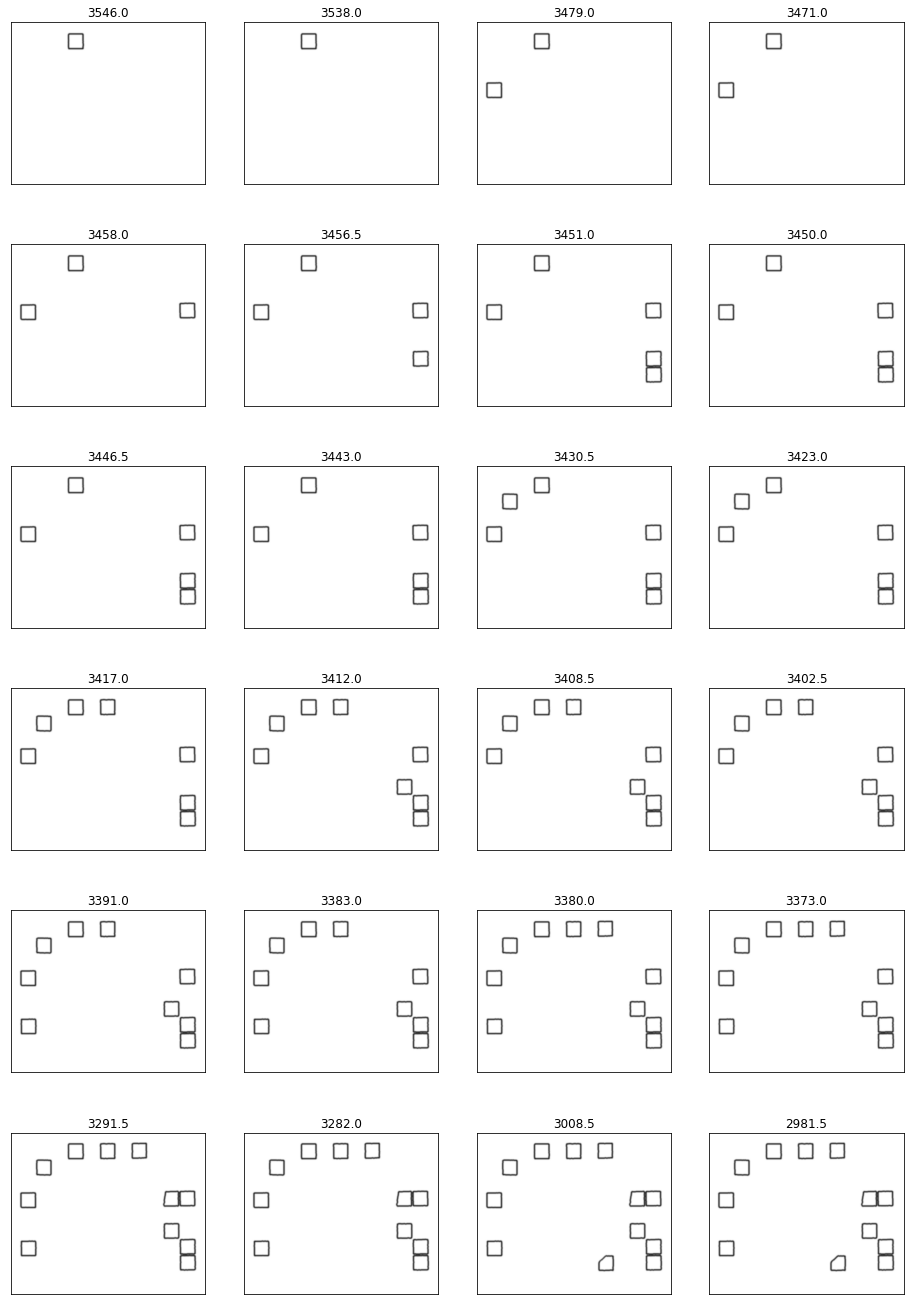

In [85]:
plt.figure(figsize=(16,32))
total = 32
ncols = 4
nrows = (total + ncols - 1) // ncols
index = 0
imgt = np.full_like(img, 255)
for i in range(len(contours0)):
    area = cv2.contourArea(contours[i])
    if area < halfarea:
        continue
    cv2.drawContours(imgt, contours0, i, (0,0,0), 3)
    index += 1
    plt.subplot(nrows, ncols, index)
    plt.imshow(imgt, interpolation='bicubic')
    plt.title(area), plt.xticks([]), plt.yticks([])
    if index == total:
        break

plt.show()